In [28]:
import pandas as pd

def Fasta_gen(pathtocsv,outputnames):
    """
    provide fasta file for complex
    """
    df=pd.read_csv(pathtocsv)
    seqs = df["aa_seq"].apply(lambda x: x.rstrip("*"))
    print(len(seqs))

    names=df["Isoform_ID"]
# Write complexes to FASTA
    with open(outputnames, "w") as f:
        for i in range(2):  # only first and second sequences
            for j in range(2, len(seqs)):  # pair with sequences after i
                f.write(f">{names[i]}_{names[j]}\n")
                f.write(f"{seqs[i]}:{seqs[j]}\n")
    return 0

In [29]:
Fasta_gen("Data/NEFL_ORF_nucleotides_aa.csv","input_fileNEFL.fasta")
Fasta_gen("Data\ORF_nucleotides_aa.csv","input_fileFAM64A.fasta")

19
18


0

In [30]:
import json 
import pandas as pd

def Alpha_fold_servers_JSON(pathtocsv,outputnames,number_isoforms=2):
    """
    Creates JSON file with format specific for AF3 server.
    Imput pathtocsv -- 
    the name of output --outputnames
    The input file must have the following format -- first the isoform sequences and then the interactor sequences.
    the function tests the first elements against each other interactors.

    """
    df=pd.read_csv(pathtocsv)
    seqs = df["aa_seq"].apply(lambda x: x.rstrip("*"))
    print(len(seqs))

    

    names=df["Isoform_ID"]
# Write complexes to FASTA
    with open(outputnames, "w") as f:
        complexes=[]
        for i in range(number_isoforms):  # only first and second sequences
            for j in range(number_isoforms, len(seqs)):  # pair with sequences after i

                complexes.append({
                            "name": f"complex_{names[i]}_{names[j]}",
                            "modelSeeds": [],
                            "sequences": [
                                {
                                    "proteinChain": {
                                        "sequence": seqs[i],
                                        "count": 1
                                    }
                                },
                                {
                                    "proteinChain": {
                                        "sequence": seqs[j],
                                        "count": 1
                                    }
                                }
                            ],
                            "dialect": "alphafoldserver",
                            "version": 1
                        })
                # Write JSON file
                
        json.dump(complexes, f, indent=2)
                
    print(f"JSON written to {outputnames}")            
                
                
    return 0

In [31]:
Alpha_fold_servers_JSON("Data/UPP_necessaryv2.csv","AF3inputupp2.json",number_isoforms=4)


8
JSON written to AF3inputupp2.json


0

In [32]:
import os
import json
import pandas as pd

def extract_af3_confidences(unzipped_dir):
    results = []
    
    # Walk through all subfolders and files
    for root, dirs, files in os.walk(unzipped_dir):
        
        for file in files:
            
            if "confidences_0" in file and file.endswith(".json"):
                
                file_path = os.path.join(root, file)
                with open(file_path, "r") as f:
                    data = json.load(f)

                # Extract complex name and model number
                complex_name = file.split("_summary_confidences_")[0].replace("fold_", "")
                model_number = file.split("_")[-1].replace(".json", "")

                # The JSON typically has iptm, ptm, plDDT etc.
                results.append({
                    "complex": complex_name,
                    "model": model_number,
                    **data  # expand JSON fields directly into columns
                })

    df = pd.DataFrame(results)
    
    return df


# Example usage:
NEFL_df = extract_af3_confidences("D:/Masters_Data/Project-GPCR/AF3_server/NEFL_output")
FAM64A_df = extract_af3_confidences("D:/Masters_Data/project-GPCR/AF3_server/FAM64A_output")
upp2_df = extract_af3_confidences("AF3_server/upp2_output")



In [33]:
import numpy as np

#extract iptms
NEFL_iptm=NEFL_df["iptm"]
FAM64A_iptm=FAM64A_df["iptm"]
upp2_iptm=upp2_df["iptm"]

#extract ptms
NEFL_ptm=NEFL_df["ptm"]
FAM64A_ptm=FAM64A_df["ptm"]
upp2_ptm=upp2_df["ptm"]



NEFL_iptm=NEFL_iptm.to_numpy()
FAM64A_iptm=FAM64A_iptm.to_numpy()
upp2_iptm=upp2_iptm.to_numpy()

NEFL_ptm=NEFL_ptm.to_numpy()
FAM64A_ptm=FAM64A_ptm.to_numpy()
upp2_ptm=upp2_ptm.to_numpy()



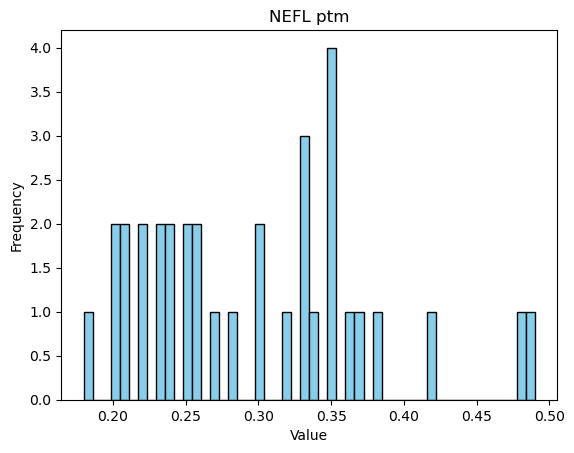

In [34]:
import matplotlib.pyplot as plt


plt.hist(NEFL_df["ptm"].to_numpy(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('NEFL ptm')
plt.show()

In [35]:
print(np.mean(FAM64A_df["ranking_score"]))
print(np.mean(NEFL_df["ranking_score"]))
print(np.mean(upp2_df["ranking_score"]))

0.5048717948717949
0.47852941176470587
0.6012500000000001


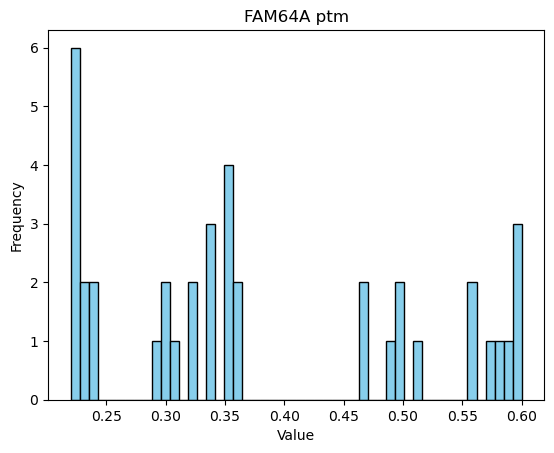

In [36]:
import matplotlib.pyplot as plt


plt.hist(FAM64A_df["ptm"].to_numpy(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('FAM64A ptm')
plt.show()

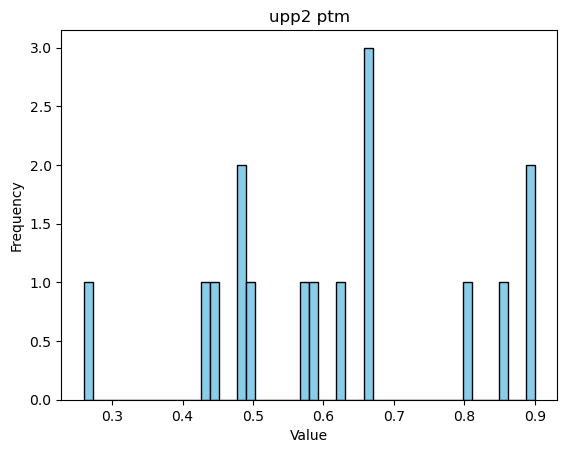

In [37]:
import matplotlib.pyplot as plt


plt.hist(upp2_df["ptm"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('upp2 ptm')
plt.show()

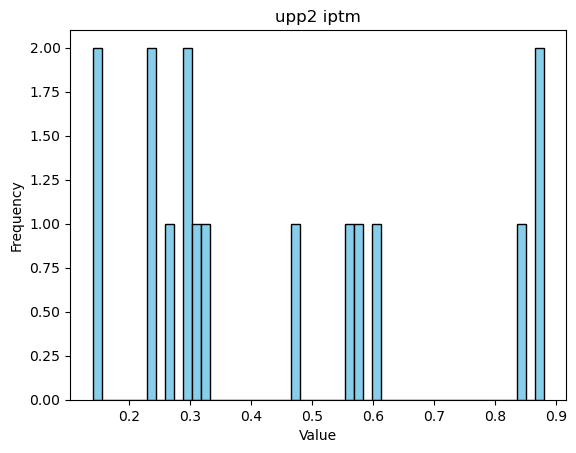

In [38]:
import matplotlib.pyplot as plt


plt.hist(upp2_df["iptm"], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('upp2 iptm')
plt.show()

Now it would be interesting to split the first and second isoform and see their iptm distributions

In [39]:
upp2_df=upp2_df

In [40]:
nefl1_iptm=[]
nefl2_iptm=[]
for i in range(len(NEFL_df)):
        
    if f"nefl_1" in NEFL_df["complex"][i]:
            
        nefl1_iptm.append(NEFL_df["ptm"][i])
    else:
        nefl2_iptm.append(NEFL_df["ptm"][i])



FAM64A1_iptm=[]
FAM64A2_iptm=[]
for i in range(len(FAM64A_df)):
    
    if "fam64a_1" in FAM64A_df["complex"][i]:
        FAM64A1_iptm.append(FAM64A_df["ptm"][i])
    else:
        FAM64A2_iptm.append(FAM64A_df["ptm"][i])


upp2_1_iptm=[]
upp2_2_iptm=[]
upp2_3_iptm=[]
upp2_4_iptm=[]

for i in range(len(upp2_df)):
    
    if "upp2_1" in upp2_df["complex"][i]:
        
        upp2_1_iptm.append(upp2_df["iptm"][i])#here upp2_1 is also one of the interactors. so inside the 1 if loop we check other proteins

        if "upp2_3" in upp2_df["complex"][i]:
        
            upp2_3_iptm.append(upp2_df["iptm"][i])

        elif "upp2_4" in upp2_df["complex"][i]:
            upp2_4_iptm.append(upp2_df["iptm"][i])
            

        elif "upp2_2" in upp2_df["complex"][i]:
            upp2_2_iptm.append(upp2_df["iptm"][i])
        
        else:
            continue
            

    elif "upp2_3" in upp2_df["complex"][i]:
       
        upp2_3_iptm.append(upp2_df["iptm"][i])

    elif "upp2_4" in upp2_df["complex"][i]:
        upp2_4_iptm.append(upp2_df["iptm"][i])
        

    elif "upp2_2" in upp2_df["complex"][i]:
        upp2_2_iptm.append(upp2_df["iptm"][i])
    
       


# upp2_1_iptm=[]
# upp2_2_iptm=[]

# for i in range(len(upp2_df)):
    
#     if "upp2_1" in upp2_df["complex"][i]:
#         upp2_1_iptm.append(upp2_df["iptm"][i])
#     else:
#         upp2_2_iptm.append(upp2_df["iptm"][i])
   

In [41]:
print(upp2_1_iptm)
print(upp2_2_iptm)
print(upp2_3_iptm)
print(upp2_4_iptm)

[0.15, 0.29, 0.47, 0.88, 0.88, 0.84, 0.61]
[0.24, 0.56, 0.58, 0.88]
[0.24, 0.3, 0.33, 0.84]
[0.14, 0.31, 0.27, 0.61]


In [42]:
upp2_df

,complex,model,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,num_recycles,ptm,ranking_score
0,complex_upp2_1_meox2,0,"[0.15, 0.15]","[[0.85, 0.15], [0.15, 0.25]]","[[0.76, 19.72], [22.85, 0.76]]","[0.85, 0.25]",0.45,0.0,0.15,10.0,0.50,0.44
1,complex_upp2_1_siah1_orf1,0,"[0.29, 0.29]","[[0.84, 0.29], [0.29, 0.64]]","[[0.76, 8.71], [8.82, 0.76]]","[0.84, 0.64]",0.10,0.0,0.29,10.0,0.58,0.39
2,complex_upp2_1_siah1_orf2,0,"[0.47, 0.47]","[[0.86, 0.47], [0.47, 0.57]]","[[0.76, 5.09], [5.93, 0.76]]","[0.86, 0.57]",0.14,0.0,0.47,10.0,0.62,0.57
3,complex_upp2_1_upp2_1,0,"[0.88, 0.88]","[[0.88, 0.88], [0.88, 0.88]]","[[0.76, 0.82], [0.82, 0.76]]","[0.88, 0.88]",0.09,0.0,0.88,10.0,0.90,0.93
4,complex_upp2_2_meox2,0,"[0.24, 0.24]","[[0.83, 0.24], [0.24, 0.25]]","[[0.76, 20.62], [16.93, 0.76]]","[0.83, 0.25]",0.48,0.0,0.24,10.0,0.48,0.52
5,complex_upp2_2_siah1_orf1,0,"[0.56, 0.56]","[[0.83, 0.56], [0.56, 0.62]]","[[0.76, 5.2], [4.71, 0.76]]","[0.83, 0.62]",0.10,0.0,0.56,10.0,0.66,0.63
6,complex_upp2_2_siah1_orf2,0,"[0.58, 0.58]","[[0.84, 0.58], [0.58, 0.59]]","[[0.76, 4.36], [4.31, 0.76]]","[0.84, 0.59]",0.15,0.0,0.58,10.0,0.66,0.67
7,complex_upp2_2_upp2_1,0,"[0.88, 0.88]","[[0.86, 0.88], [0.88, 0.88]]","[[0.76, 0.82], [0.83, 0.76]]","[0.86, 0.88]",0.09,0.0,0.88,10.0,0.89,0.93
8,complex_upp2_3_meox2,0,"[0.24, 0.24]","[[0.75, 0.24], [0.24, 0.25]]","[[0.76, 15.84], [15.74, 0.76]]","[0.75, 0.25]",0.49,0.0,0.24,10.0,0.43,0.52
9,complex_upp2_3_siah1_orf1,0,"[0.3, 0.3]","[[0.67, 0.3], [0.3, 0.67]]","[[0.76, 7.87], [7.59, 0.76]]","[0.67, 0.67]",0.10,0.0,0.30,10.0,0.48,0.38


In [43]:
len(FAM64A1_iptm)

22

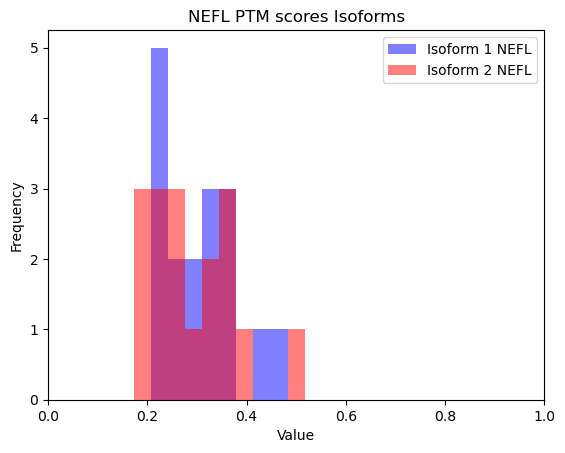

In [44]:
# Plot overlapping histograms

bins = np.linspace(0, 1, 30)  # 30 equally spaced bins


plt.hist(nefl1_iptm, bins=bins, color='blue', alpha=0.5, label='Isoform 1 NEFL')
plt.hist(nefl2_iptm, bins=bins, color='red', alpha=0.5, label='Isoform 2 NEFL')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('NEFL PTM scores Isoforms')
plt.legend()
plt.xlim(0,1)
plt.show()

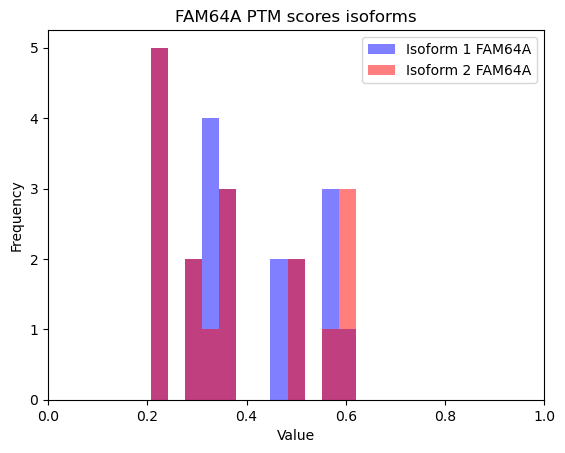

In [45]:
# Plot overlapping histograms
plt.hist(FAM64A1_iptm, bins=bins, color='blue', alpha=0.5, label='Isoform 1 FAM64A')
plt.hist(FAM64A2_iptm, bins=bins, color='red', alpha=0.5, label='Isoform 2 FAM64A')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('FAM64A PTM scores isoforms')
plt.legend()
plt.xlim(0,1)
plt.show()

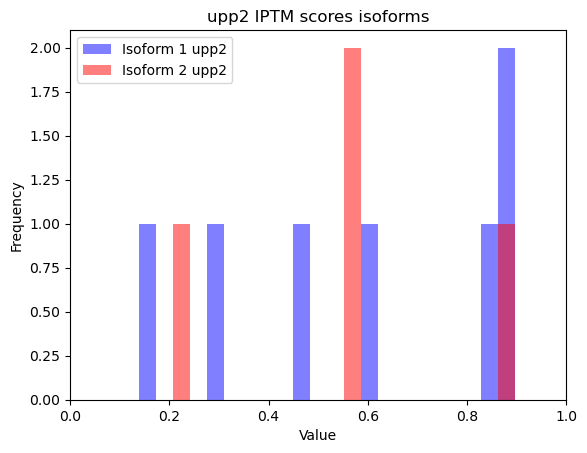

In [46]:
# Plot overlapping 

# Define common bin edges

plt.hist(upp2_1_iptm, bins=bins, color='blue', alpha=0.5, label='Isoform 1 upp2')
plt.hist(upp2_2_iptm, bins=bins, color='red', alpha=0.5, label='Isoform 2 upp2')
# plt.hist(upp2_3_iptm, bins=bins, color='yellow', alpha=0.5, label='Isoform 3 upp2')
# plt.hist(upp2_4_iptm, bins=bins, color='green', alpha=0.5, label='Isoform 4 upp2')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('upp2 IPTM scores isoforms')
plt.legend()
plt.xlim(0,1)
plt.show()

In [47]:
# from compute_contacts import compute_af3_contacts
# #compute contacts in every complex
# NEFL_distances = compute_af3_contacts("D:/Masters_Data/Project-GPCR/AF3_server/NEFL_output")
# FAM64A_distances = compute_af3_contacts("D:/Masters_Data/project-GPCR/AF3_server/FAM64A_output")

In [48]:
from compute_contacts import contact_df

clean_NEFL=contact_df("D:/Masters_Data/Project-GPCR/AF3_server/NEFL_output")
clean_FAM64A=contact_df("D:/Masters_Data/project-GPCR/AF3_server/FAM64A_output")
clean_upp2=contact_df("D:/Masters_Data/Project-GPCR/AF3_server/upp2_output")

In [49]:
clean_NEFL

,complex_name,contact_count
0,nefl_1_c10orf96,181
1,nefl_1_ccdc33,190
2,nefl_1_cep57l1,256
3,nefl_1_des,289
4,nefl_1_gfap,276
5,nefl_1_golga2_orf1,497
6,nefl_1_golga2_orf2,359
7,nefl_1_gorasp1,18
8,nefl_1_kifc3,271
9,nefl_1_klc3,162


In [50]:
clean_NEFL["iptm"]=NEFL_df["iptm"]
clean_NEFL["ptm"]=NEFL_df["ptm"]
clean_NEFL["ranking_score"]=NEFL_df["ranking_score"]

clean_FAM64A["iptm"]=FAM64A_df["iptm"]
clean_FAM64A["ptm"]=FAM64A_df["ptm"]
clean_FAM64A["ranking_score"]=FAM64A_df["ranking_score"]


clean_upp2["iptm"]=upp2_df["iptm"]
clean_upp2["ptm"]=upp2_df["ptm"]
clean_upp2["ranking_score"]=upp2_df["ranking_score"]


In [57]:
clean_upp2[clean_upp2["iptm"]>0.8]

,complex_name,contact_count,iptm,ptm,ranking_score,Interaction_Found
3,upp2_1_upp2_1,181,0.88,0.90,0.93,positive
7,upp2_2_upp2_1,173,0.88,0.89,0.93,positive
11,upp2_3_upp2_1,173,0.84,0.85,0.89,negative


In [51]:
def load_labels_sort_by_reference(filepath,reference_df):
    """
    Loads only the 'Interaction_Found' column from a CSV file.
    sorts the array given by collumns Isoform_ID and Interactor_ID and returns reference dataframe with labels
    """
    df2 = pd.read_csv(filepath)
    df2 = df2.sort_values(by=["Gene_Symbol", "Isoform_ID", "Interactor_Symbol"])

    reference_df["complex_name"] = reference_df["complex_name"].str.lower() 
    
    df2["complex_name"] = (
    df2["Isoform_ID"].str.lower()
    + "_"
    + df2["Interactor_ID"].str.lower()
)
    
    # Now merge on "complex_name"
    reference_df = reference_df.merge(df2[["complex_name", "Interaction_Found"]],
                   on="complex_name", how="left")
    return reference_df

clean_FAM64A=load_labels_sort_by_reference("Data/ppi_fam-trim.csv",clean_FAM64A)
clean_NEFL=load_labels_sort_by_reference("Data/NEFL_ppi_fam-trim.csv",clean_NEFL)
clean_upp2=load_labels_sort_by_reference("Data/upp2.trim.csv",clean_upp2)
# clean_FAM64A["Interaction_Found"]=load_last_column_by_name("Data/ppi_fam-trim_nointer.csv")

ROC plots

Problem: apparently not all the interactors are tested on both isoforms. example: NEFL_1_KR13 NEFL_1_KR15 and these interactions exist for NEFL 2. Possibilities: not predict if they interact because its not measured on both complexes or delete the Nans and predict the labels of the complexes present. I will remove the NaNs and predict complexes even if not on both isoforms 

Problem 2: there is a transmembrane protein in the dataset. LOC100288797


Optimal Threshold (Youden’s J): 0.260


<Figure size 1000x800 with 0 Axes>

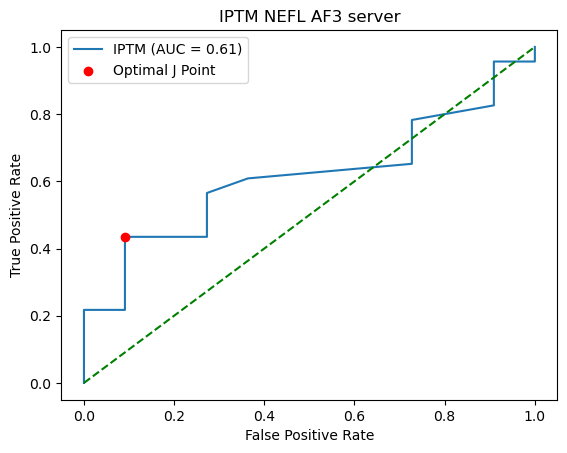

The true positive rate is0.43478260869565216, and the false positive rate is 0.09090909090909091


In [52]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


df_all = pd.concat([clean_NEFL, clean_FAM64A], ignore_index=True)

df_all = df_all.dropna()
# Compute ROC curve and AUC
labels = clean_NEFL["Interaction_Found"].to_numpy()

labels

labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_NEFL["iptm"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IPTM')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("IPTM NEFL AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

Optimal Threshold (Youden’s J): 0.280


<Figure size 1000x800 with 0 Axes>

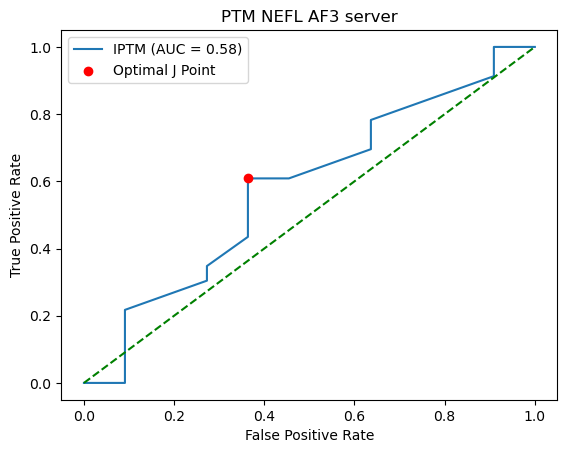

The true positive rate is0.6086956521739131, and the false positive rate is 0.36363636363636365


In [53]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


df_all = pd.concat([clean_NEFL, clean_FAM64A], ignore_index=True)

df_all = df_all.dropna()
# Compute ROC curve and AUC
labels = clean_NEFL["Interaction_Found"].to_numpy()

labels

labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_NEFL["ptm"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IPTM')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("PTM NEFL AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

In [54]:

fpr, tpr, thresholds = roc_curve(labels,  df_all["ptm"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='PTM')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("PTM AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

ValueError: Found input variables with inconsistent numbers of samples: [34, 70]

In [ ]:
clean_upp2

,complex_name,contact_count,iptm,ptm,ranking_score,Interaction_Found
0,s100b_1_agtrap,31,0.05,0.39,0.20,negative
1,s100b_1_loc100288797,47,0.41,0.35,0.72,negative
2,s100b_1_mal2,9,0.07,0.33,0.17,negative
3,s100b_1_rabac1,54,0.12,0.29,0.21,negative
4,s100b_1_s100a_1,96,0.65,0.67,0.66,positive
5,s100b_1_tmem159,11,0.09,0.32,0.40,negative
6,s100b_1_tmem159,12,0.09,0.32,0.40,negative
7,s100b_2_agtrap,32,0.07,0.42,0.30,positive
8,s100b_2_loc100288797,1,0.06,0.21,0.50,positive
9,s100b_2_mal2,29,0.11,0.38,0.30,positive


Optimal Threshold (Youden’s J): 0.060


<Figure size 1000x800 with 0 Axes>

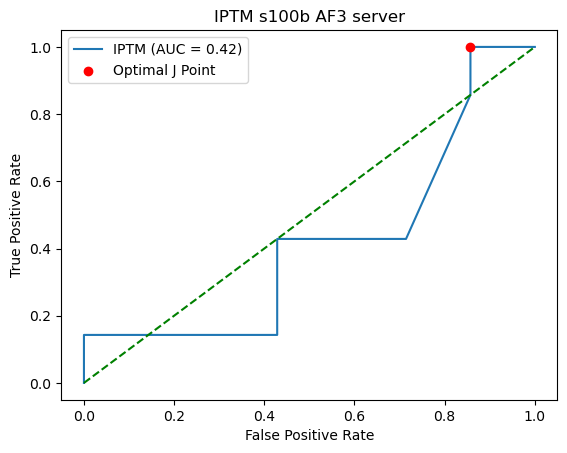

The true positive rate is1.0, and the false positive rate is 0.8571428571428571


In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay




# Compute ROC curve and AUC
labels = clean_upp2["Interaction_Found"].to_numpy()



labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_upp2["iptm"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IPTM')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("IPTM upp2 AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

Optimal Threshold (Youden’s J): 0.370


<Figure size 1000x800 with 0 Axes>

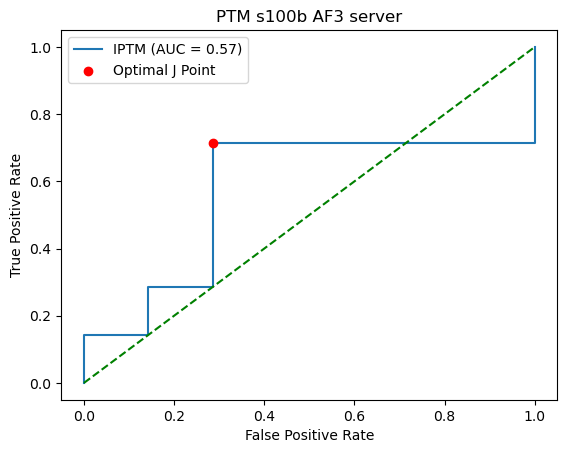

The true positive rate is0.7142857142857143, and the false positive rate is 0.2857142857142857


In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay




# Compute ROC curve and AUC
labels = clean_upp2["Interaction_Found"].to_numpy()



labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_upp2["ptm"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='IPTM')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("PTM upp2 AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

Optimal Threshold (Youden’s J): 194.000


<Figure size 1000x800 with 0 Axes>

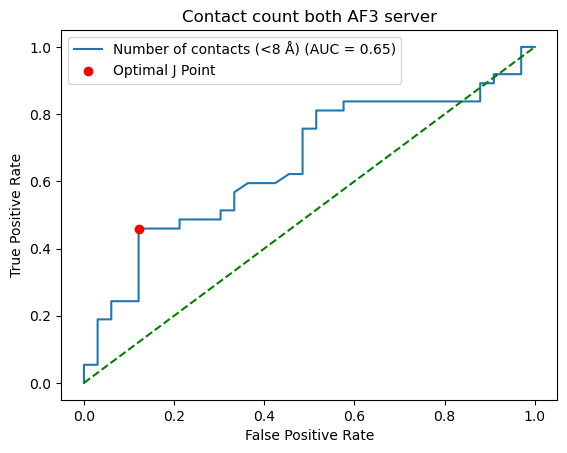

The true positive rate is0.4594594594594595, and the false positive rate is 0.12121212121212122


In [ ]:
labels = df_all["Interaction_Found"].to_numpy()



labels = [-1 if x == "negative" else 1 for x in labels]
labels


fpr, tpr, thresholds = roc_curve(labels,  df_all["contact_count"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Number of contacts (<8 Å)')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label='Optimal J Point', zorder=3)
plt.legend()
plt.title("Contact count both AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

In [ ]:
#The contact number is biased towards bigger proteins. To minimize this I will divide the number contacts by the number of AA of each isoform


Now number of contacts ROC plot for each of 2 proteins

Optimal Threshold (Youden’s J): 74.000


<Figure size 1000x800 with 0 Axes>

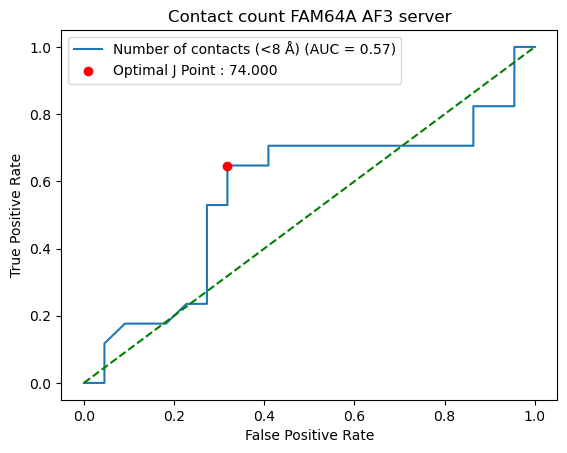

The true positive rate is0.6470588235294118, and the false positive rate is 0.3181818181818182


In [ ]:
# Compute ROC curve and AUC
labels = clean_FAM64A["Interaction_Found"].to_numpy()


labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_FAM64A["contact_count"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Number of contacts (<8 Å)')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Optimal J Point : {ddgthreshold:.3f}', zorder=3)
plt.legend()
plt.title("Contact count FAM64A AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

Optimal Threshold (Youden’s J): 194.000


<Figure size 1000x800 with 0 Axes>

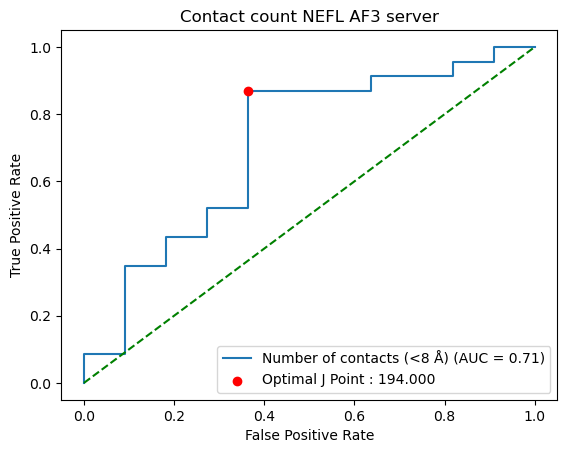

The true positive rate is0.8695652173913043, and the false positive rate is 0.36363636363636365


In [ ]:
# Compute ROC curve and AUC
labels = clean_NEFL["Interaction_Found"].to_numpy()


labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_NEFL["contact_count"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Number of contacts (<8 Å)')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Optimal J Point : {ddgthreshold:.3f}', zorder=3)
plt.legend()
plt.title("Contact count NEFL AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

Optimal Threshold (Youden’s J): 25.000


<Figure size 1000x800 with 0 Axes>

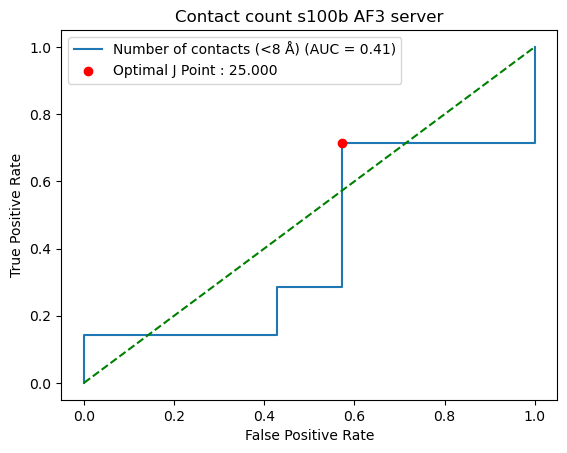

The true positive rate is0.7142857142857143, and the false positive rate is 0.5714285714285714


In [ ]:

# Compute ROC curve and AUC
labels = clean_upp2["Interaction_Found"].to_numpy()


labels = [-1 if x == "negative" else 1 for x in labels]
labels
fpr, tpr, thresholds = roc_curve(labels,  clean_upp2["contact_count"].to_numpy())  

roc_auc = auc(fpr, tpr)

J_scores = tpr - fpr
best_index = np.argmax(J_scores)
ddgthreshold = thresholds[best_index]

print(f"Optimal Threshold (Youden’s J): {ddgthreshold:.3f}")
# Plot ROC curve
plt.figure(figsize=(10, 8))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Number of contacts (<8 Å)')
display.plot()

# Mark the optimal Youden’s J point
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Optimal J Point : {ddgthreshold:.3f}', zorder=3)
plt.legend()
plt.title("Contact count upp2 AF3 server")
plt.plot([0, 1], [0, 1], linestyle='--', color='green')  # Diagonal line
plt.show()
print(f"The true positive rate is{tpr[best_index]}, and the false positive rate is {fpr[best_index]}")

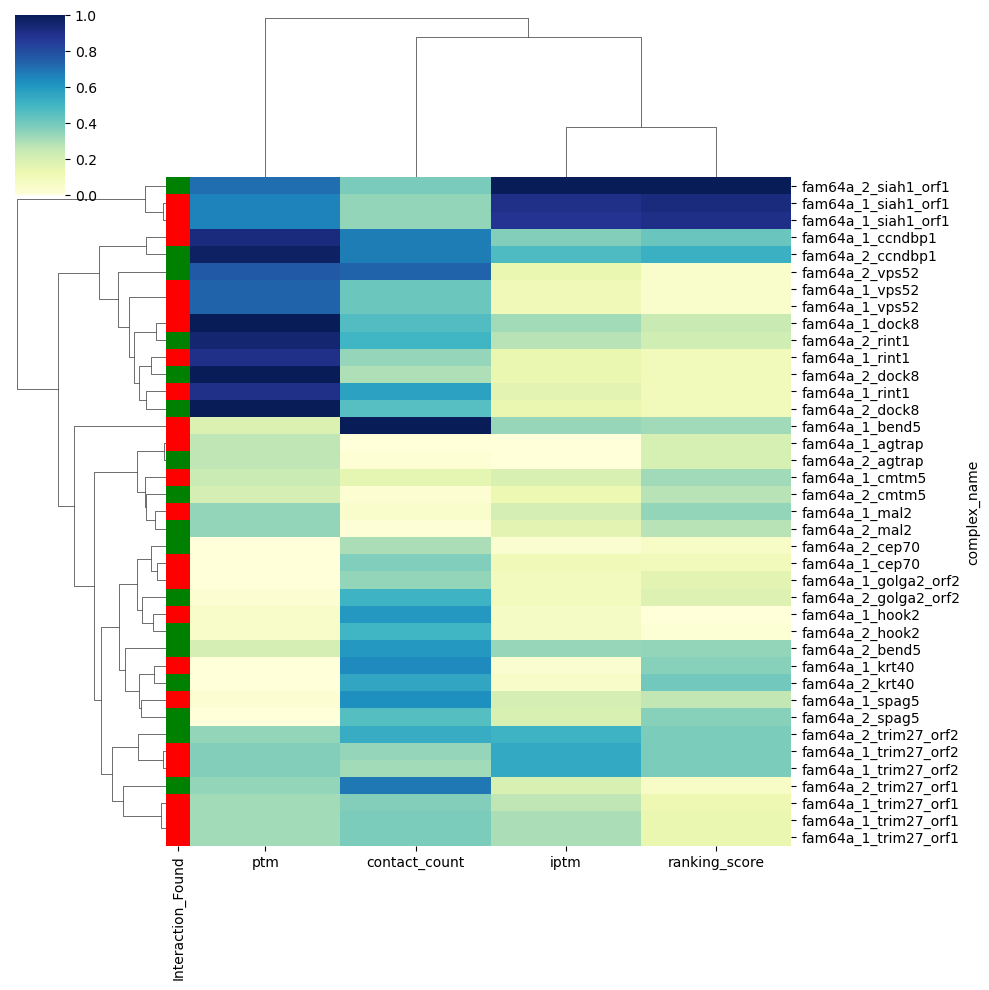

In [ ]:
import seaborn as sns
import pandas as pd

labels = clean_FAM64A["Interaction_Found"]           
names = clean_FAM64A["complex_name"]

# set index first
features = clean_FAM64A.drop(columns=["Interaction_Found","complex_name"])
features.index = names

# make row_colors indexed the same way
lut = {"negative": "red", "positive": "green"}
row_colors = labels.map(lut)
row_colors.index = names   # ensure alignment

# plot
sns.clustermap(features, row_colors=row_colors, cmap="YlGnBu", standard_scale=1)

In [ ]:
clean_FAM64A

,complex_name,contact_count,iptm,ptm,ranking_score,Interaction_Found
0,fam64a_1_agtrap,0,0.08,0.32,0.47,negative
1,fam64a_1_bend5,163,0.27,0.29,0.53,negative
2,fam64a_1_ccndbp1,110,0.29,0.57,0.58,negative
3,fam64a_1_cep70,61,0.14,0.22,0.42,negative
4,fam64a_1_cmtm5,25,0.19,0.31,0.53,negative
5,fam64a_1_dock8,76,0.26,0.60,0.49,negative
6,fam64a_1_golga2_orf2,56,0.13,0.22,0.45,negative
7,fam64a_1_hook2,98,0.12,0.24,0.37,negative
8,fam64a_1_krt40,105,0.10,0.22,0.55,negative
9,fam64a_1_mal2,7,0.20,0.35,0.54,negative


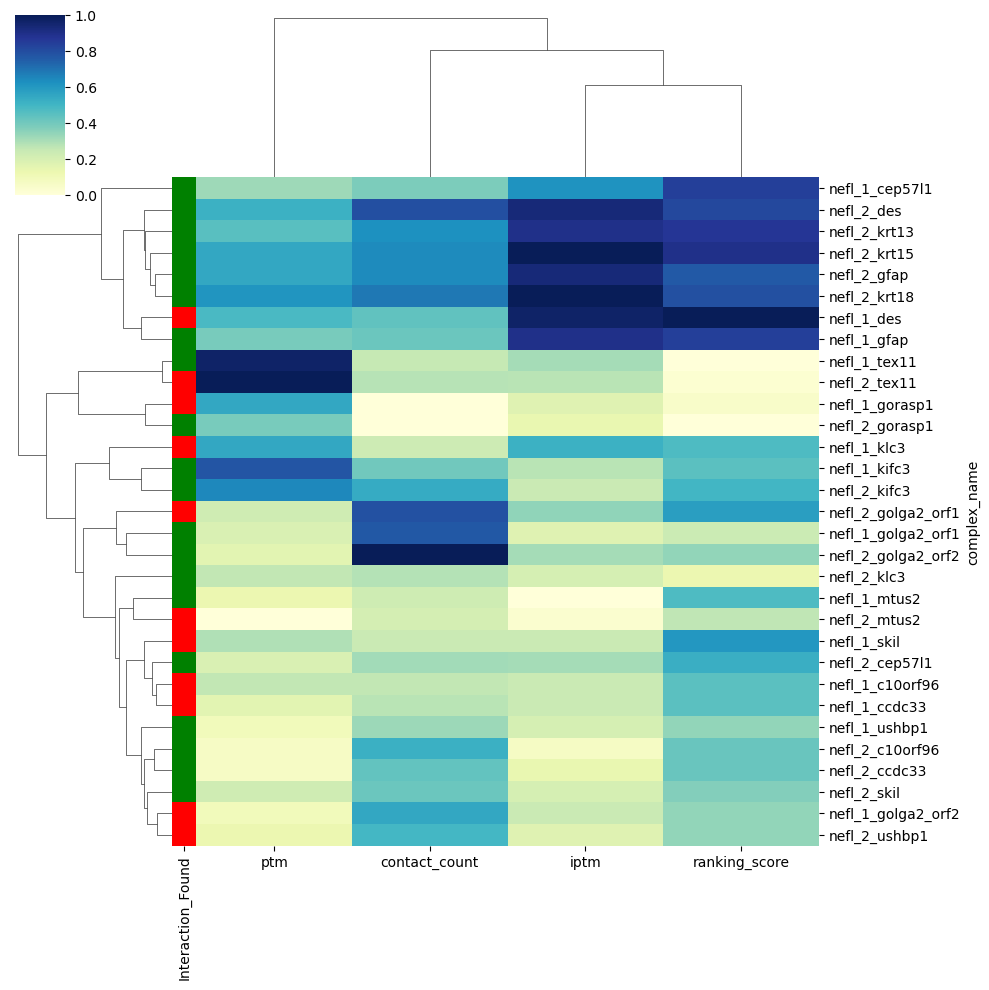

In [ ]:
import seaborn as sns
import pandas as pd

clean_NEFL=clean_NEFL.dropna()
labels = clean_NEFL["Interaction_Found"]           
names = clean_NEFL["complex_name"]

# set index first
features = clean_NEFL.drop(columns=["Interaction_Found","complex_name"])
features.index = names

# make row_colors indexed the same way
lut = {"negative": "red", "positive": "green"}
row_colors = labels.map(lut)
row_colors.index = names   # ensure alignment

# plot
sns.clustermap(features, row_colors=row_colors, cmap="YlGnBu", standard_scale=1)

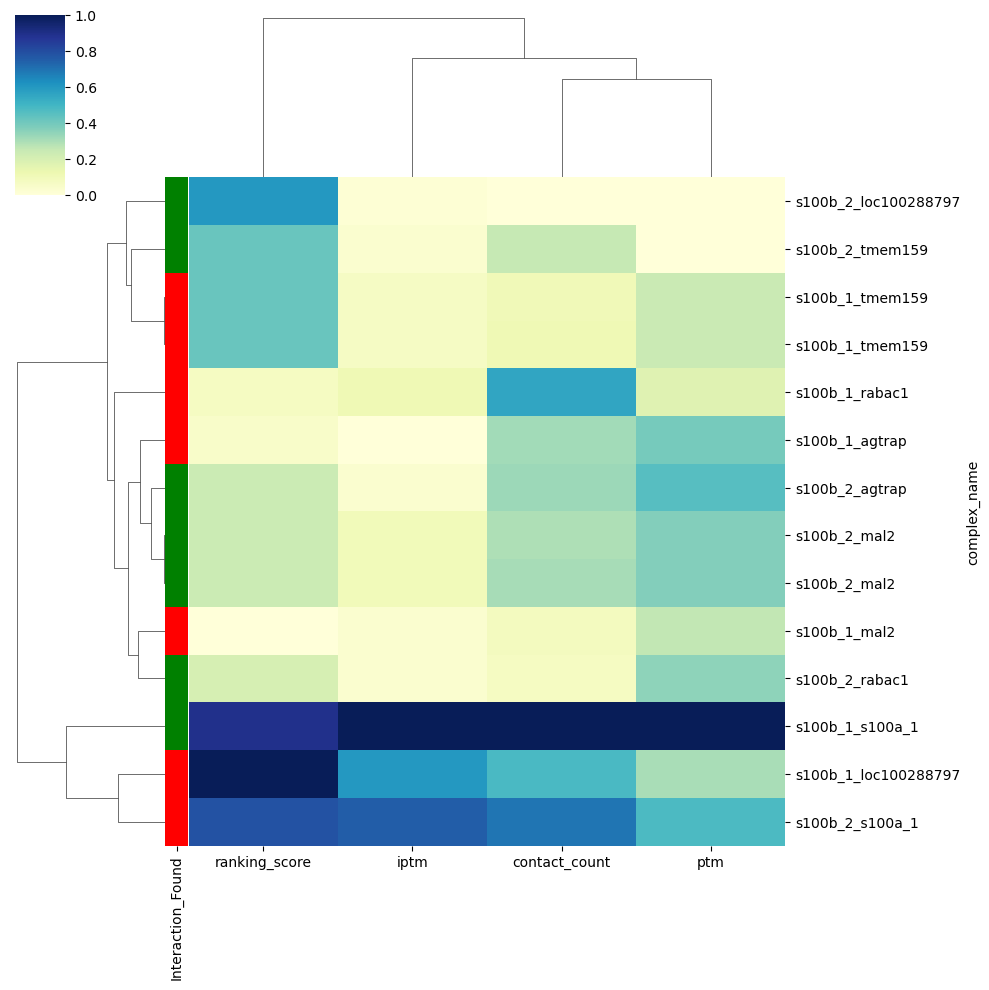

In [ ]:
import seaborn as sns
import pandas as pd

clean_upp2=clean_upp2.dropna()
labels = clean_upp2["Interaction_Found"]           
names = clean_upp2["complex_name"]

# set index first
features = clean_upp2.drop(columns=["Interaction_Found","complex_name"])
features.index = names

# make row_colors indexed the same way
lut = {"negative": "red", "positive": "green"}
row_colors = labels.map(lut)
row_colors.index = names   # ensure alignment

# plot
sns.clustermap(features, row_colors=row_colors, cmap="YlGnBu", standard_scale=1)

In [ ]:
clean_FAM64A
clean_NEFL
clean_upp2

,complex_name,contact_count,iptm,ptm,ranking_score,Interaction_Found
0,s100b_1_agtrap,31,0.05,0.39,0.20,negative
1,s100b_1_loc100288797,47,0.41,0.35,0.72,negative
2,s100b_1_mal2,9,0.07,0.33,0.17,negative
3,s100b_1_rabac1,54,0.12,0.29,0.21,negative
4,s100b_1_s100a_1,96,0.65,0.67,0.66,positive
5,s100b_1_tmem159,11,0.09,0.32,0.40,negative
6,s100b_1_tmem159,12,0.09,0.32,0.40,negative
7,s100b_2_agtrap,32,0.07,0.42,0.30,positive
8,s100b_2_loc100288797,1,0.06,0.21,0.50,positive
9,s100b_2_mal2,29,0.11,0.38,0.30,positive


In [ ]:
clean_FAM64A.to_csv("results/FAM64A.csv", index=False)
clean_NEFL.to_csv("results/NEFL.csv", index=False)
clean_upp2.to_csv("results/upp2.csv", index=False)
